In [1]:
%load_ext autoreload 
%autoreload 2

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from pathlib import Path
import config
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from preprocessing import dataPreProcess

In [3]:
def read_files(activity):
    dfs = []
    for file in config.DATA_FILES[activity]:
        filepath = Path(config.DATA_FOLDER, activity, file);
        with open(filepath, 'r') as file:
            raw_data = file.readlines()
            dfs.append(dataPreProcess(raw_data))
    dfs = [df.reset_index(drop = True) for df in dfs if not df is None]
    return dfs

In [4]:
activities = ['idle', 'jogging', 'after_exercise', 'exercise']
activity_labels = {'idle': 0, 'jogging': 1, 'after_exercise': 2, 'exercise': 3}

In [5]:
dfs = {}
for activity in activities:
    dfs[activity] = read_files(activity)

There are no valid SPO values, returning None


### Combining all datasets

In [6]:
all_dfs = []
for activity in activities:
    for df in dfs[activity]:
        df['Activity'] = activity_labels[activity]
        all_dfs.append(df)
        
all_dfs = pd.concat(all_dfs)

In [7]:
all_dfs.head()

,HeartRate,SPO_Values,Activity
0,166.000000,98.0,0
1,145.500000,95.0,0
2,125.000000,90.0,0
3,128.666667,100.0,0
4,132.333333,98.0,0


### Split into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(all_dfs[['HeartRate', 'SPO_Values']].values, 
                                                    all_dfs['Activity'], test_size=0.3, random_state=0, 
                                                    stratify=all_dfs['Activity'])

Text(0.5, 1.0, 'Test data distribution')

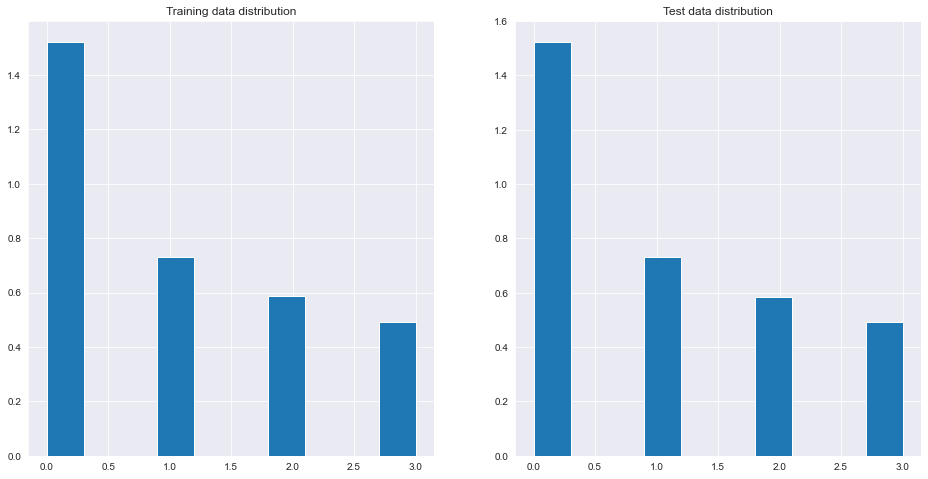

In [15]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 8))
axes[0].hist(y_train, density = True)
axes[0].set_title('Training data distribution')
axes[1].hist(y_test, density = True)
axes[1].set_title('Test data distribution')

### KMeans

In [10]:
def get_metric_score(y_true, y_pred):
    homogeneity_score = metrics.homogeneity_score(y_true, y_pred)
    completeness_score = metrics.completeness_score(y_true, y_pred)
    
    return {'homogeneity_score': homogeneity_score, 'completeness_score': completeness_score}

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=0)

In [12]:
print('Training metrics:', get_metric_score(y_train, kmeans.predict(X_train)))

Training metrics: {'homogeneity_score': 0.08255695830923838, 'completeness_score': 0.0802360289162434}


In [13]:
print('Test metrics:', get_metric_score(y_test, kmeans.predict(X_test)))

Test metrics: {'homogeneity_score': 0.06281001235648781, 'completeness_score': 0.06151456796681009}


[Text(0.5, 1.0, 'Predicted clusters (Training data)')]

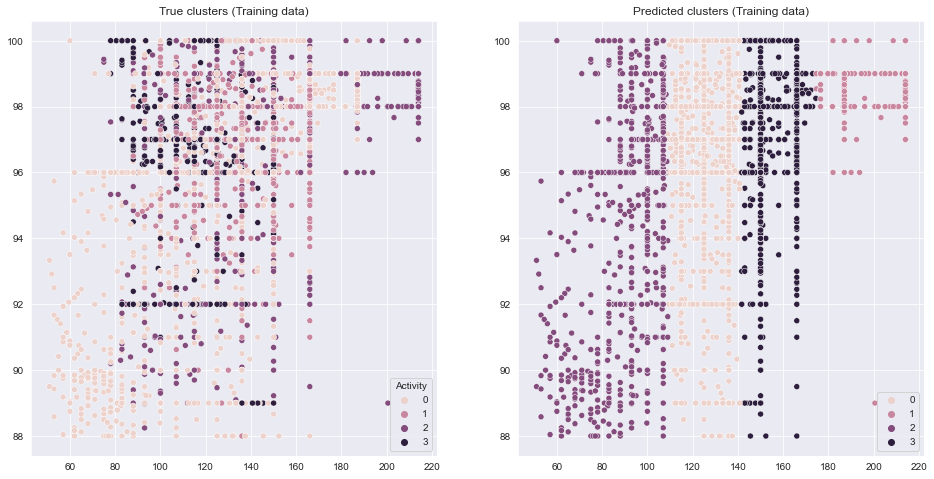

In [21]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 8))
sns.scatterplot(ax = axes[0], x = X_train[:, 0], y = X_train[:, 1], 
            hue = y_train).set(title = 'True clusters (Training data)')
sns.scatterplot(ax = axes[1], x = X_train[:, 0], y = X_train[:, 1], 
            hue = kmeans.predict(X_train)).set(title = 'Predicted clusters (Training data)')

[Text(0.5, 1.0, 'Predicted clusters (Test data)')]

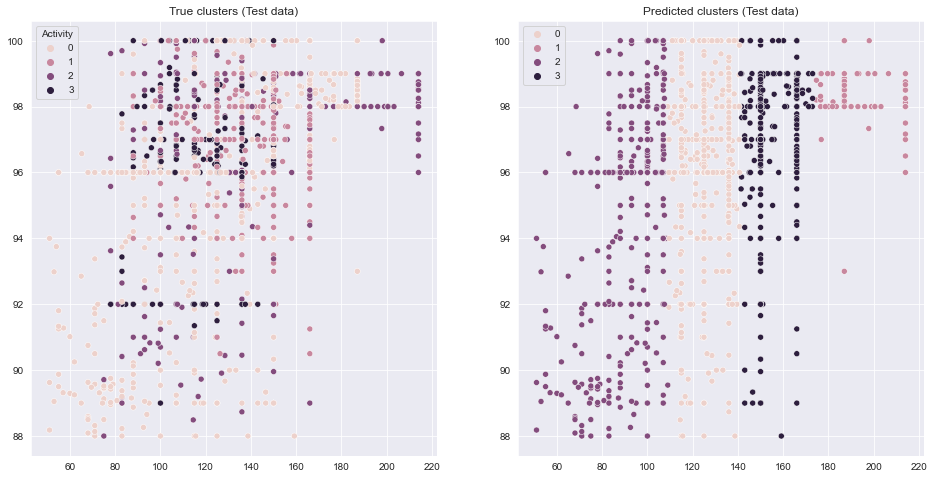

In [22]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 8))
sns.scatterplot(ax = axes[0], x = X_test[:, 0], y = X_test[:, 1], 
            hue = y_test).set(title = 'True clusters (Test data)')
sns.scatterplot(ax = axes[1], x = X_test[:, 0], y = X_test[:, 1], 
            hue = kmeans.predict(X_test)).set(title = 'Predicted clusters (Test data)')